# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [6]:
# Importamos las librerias 
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns 

In [7]:
# Cargamos el dataset 
df_car = pd.read_csv("C:\\Users\\abuen\\OneDrive\\00 - BUSINNESS INTELLIGENCE\\MODULO_2\\DATASET\\car_evaluation.csv", header=None)

### Analisis Exploratorio de datos 

In [8]:
# Visualizamos el dataframe
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [9]:
# Visualizamos el shape del objeto 
df_car.shape

(1728, 7)

In [10]:

# Como podemos ver tenemos que renombrer las columnas de manera correcta 

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df_car.columns = col_names

In [11]:
# Verificamos 
df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [12]:
# visualizamos tipo de datos 
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resume de los datos 
- Hay 7 variables en el conjunto de datos.  Todas las variables son de tipo de datos categoricos 
- Estos se dan por compra, mantenimient, personas, lug_boot, seguridad y clase 
- La clase es la variable de destino o target 

In [13]:
# Exploramos la variable target 
df_car["class"].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [14]:
# Verificamos los valores missing o nulos
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:

# separamos x y y 
X = df_car.drop(['class'], axis = 1)
y = df_car['class']

In [16]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [17]:
# veamos que obtuvimos 
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [18]:
# veamos que obtuvimos 
y_train.shape, y_test.shape

((1209,), (519,))

In [19]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [20]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Entrenamiento del modelo de clasificacion con Arbol de decision

In [21]:
# Importante: todos nuestros tipos de datos son object, realizamos una transformacion 
import category_encoders as ce #pip install category-encoders 

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons','lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)



In [22]:
# verificamos la transformacion 
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [23]:
# importar arbol de decision 
from sklearn.tree import DecisionTreeClassifier

# creacion del modelo 
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [24]:
# Entrenamiento 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [28]:
# Calculo de predicciones en Train y Test 
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [30]:
y_train_pred_tree

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

### Evaluacion de modelo de clasificacion de arbol de decision

#### 📊 Precisión (Accuracy)

La precisión se calcula como la proporción de predicciones correctas sobre el total de predicciones:

$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total de muestras}} = \frac{TP + TN}{TP + TN + FP + FN}
$$


### 🎯 Precisión (Precision)

La precisión mide cuántas de las predicciones positivas fueron realmente correctas:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} = \frac{TP}{TP + FP}
$$


### 🧪 Sensibilidad (Recall)

La sensibilidad mide la capacidad del modelo para encontrar todos los casos positivos reales:

$$
\text{Sensibilidad} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} = \frac{TP}{TP + FN}
$$


### 🔍 Especificidad (Specificity)

La especificidad mide la capacidad del modelo para identificar correctamente los casos negativos:

$$
\text{Especificidad} = \frac{\text{True Negatives}}{\text{True Negatives} + \text{False Positives}} = \frac{TN}{TN + FP}
$$


### ⚖️ F1-Score

El F1-score es la media armónica entre la precisión y la sensibilidad:

$$
\text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Sensibilidad}}{\text{Precision} + \text{Sensibilidad}} = 2 \cdot \frac{P \cdot R}{P + R}
$$

Donde:

- \( P = \frac{TP}{TP + FP} \) es la **precisión**
- \( R = \frac{TP}{TP + FN} \) es la **sensibilidad**


In [31]:
# Calculo de metricas 
from sklearn.metrics import accuracy_score

# Calculo del accuracy train y test 
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("El accuracy en train es: ", train_accuracy_tree)
print("El accuracy en train es: ", test_accuracy_tree)
 

El accuracy en train es:  0.7733664185277088
El accuracy en train es:  0.7591522157996147


C:\Users\abuen\AppData\Local\Temp\ipykernel_3860\2534498349.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=importances, palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)


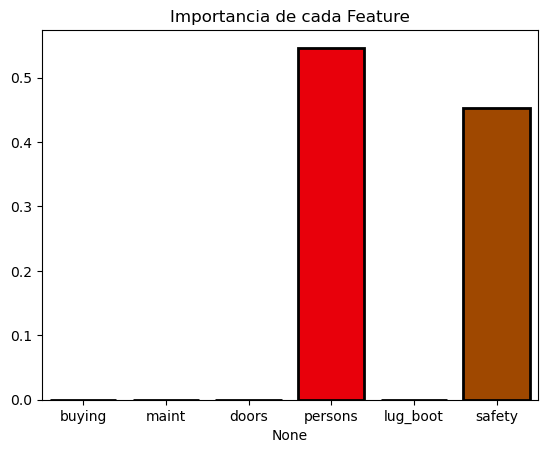

In [32]:

# Verificamos el feature importances
import seaborn as sns
import matplotlib.pyplot as plt


importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show()



### Entrenamiento de modelo de clasificacion con random forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [34]:
# Calculo de las predicciones 
y_train_pred_rf = rf.predict(X_train) 
y_test_pred_rf = rf.predict(X_test)

### Evaluacion de modelo de clasificacion con Random Forest 

In [35]:
from sklearn.metrics import accuracy_score

# Calculo el accuracy en Train 
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
# Calculo el accuracy en Train 
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("El accuracy en train es: ", train_accuracy_rf)
print("El accuracy en test es: ", test_accuracy_rf)

El accuracy en train es:  0.9942100909842845
El accuracy en test es:  0.8863198458574181


In [36]:
# Visualizacion de las feature importances 
feature_scores = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

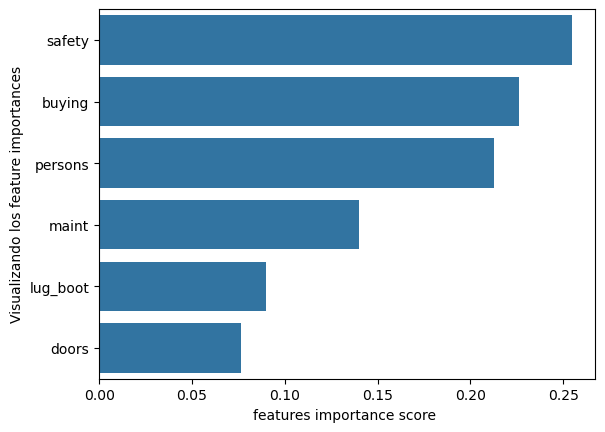

In [37]:
# grafico de barras 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.barplot(x=feature_scores, y= feature_scores.index)
plt.xlabel("features importance score ")
plt.ylabel("Visualizando los feature importances")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)

print("Matriz de confusion\n", cm)

Matriz de confusion [[ 94   4  19   1]
 [ 11   7   0   1]
 [ 10   0 348   0]
 [ 12   1   0  11]]


In [39]:
# RF 
from sklearn.metrics import classification_report
print (classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

